In [193]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.float = float
np.int = int
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
df= pd.read_csv(r"C:\Users\K\Desktop\data\heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Explore

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Checking the non - numerical values

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


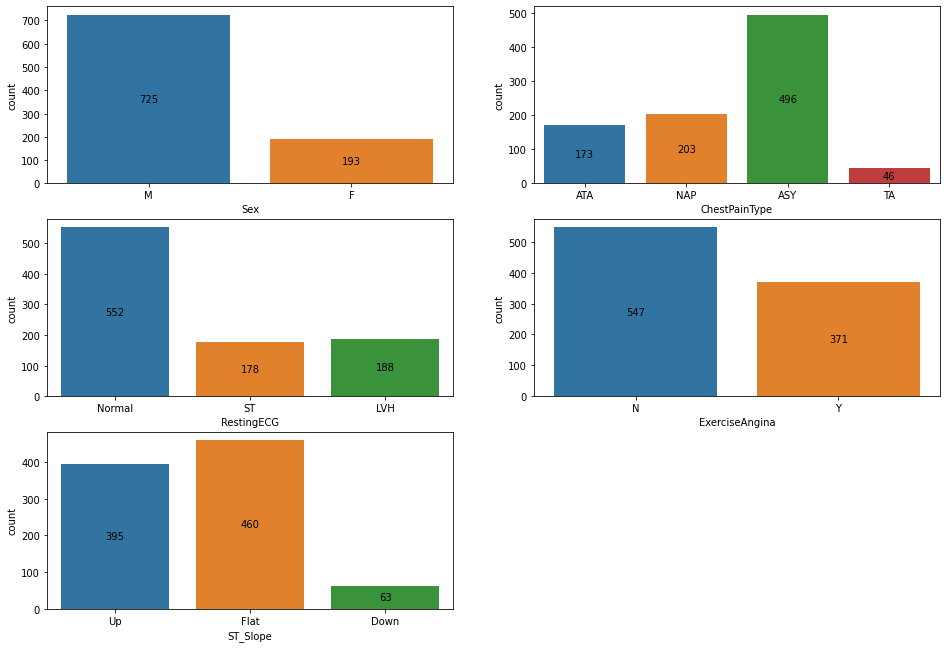

In [6]:
categorical_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
fig = plt.figure(figsize=(16, 15))
for idx, col in enumerate(categorical_cols):
    ax = plt.subplot(4, 2, idx+1)
    sns.countplot(x = df[col], ax=ax)
    for container in ax.containers:
        ax.bar_label(container, label_type ='center')

## Grouping By Heart Disease

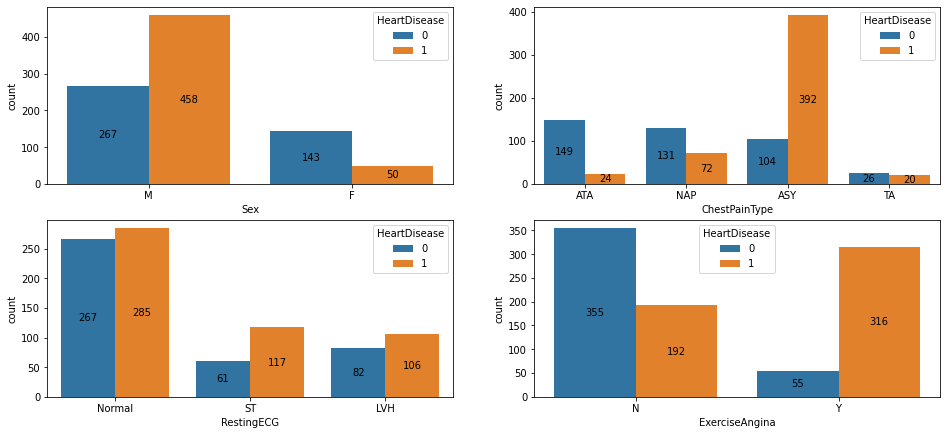

In [11]:
fig = plt.figure(figsize=(16, 15))
for idx, col in enumerate(categorical_cols[:-1]):
    ax = plt.subplot(4, 2, idx+1)
    sns.countplot(x = df[col], hue=df["HeartDisease"], ax=ax)
    for container in ax.containers:
        ax.bar_label(container, label_type ='center')

## Checking for Null or Zero Values

In [28]:
df[df[["RestingBP", "Cholesterol", "FastingBS"]] ==0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             0 non-null      float64
 1   Sex             0 non-null      object 
 2   ChestPainType   0 non-null      object 
 3   RestingBP       1 non-null      float64
 4   Cholesterol     172 non-null    float64
 5   FastingBS       704 non-null    float64
 6   RestingECG      0 non-null      object 
 7   MaxHR           0 non-null      float64
 8   ExerciseAngina  0 non-null      object 
 9   Oldpeak         0 non-null      float64
 10  ST_Slope        0 non-null      object 
 11  HeartDisease    0 non-null      float64
dtypes: float64(7), object(5)
memory usage: 86.2+ KB


## Cleaning the Dataset by Removing the Zeros

In [54]:
clean = df.copy()
clean = clean[clean["RestingBP"] != 0]
heartDisease_mask = clean["HeartDisease"] == 0
# Replace 0s with median in rows where HeartDisease == 0
clean.loc[heartDisease_mask & (clean["Cholesterol"] == 0), "Cholesterol"] = \
    clean.loc[heartDisease_mask & (clean["Cholesterol"] != 0), "Cholesterol"].median()

# Replace 0s with median in rows where HeartDisease == 1
clean.loc[~heartDisease_mask & (clean["Cholesterol"] == 0), "Cholesterol"] = \
    clean.loc[~heartDisease_mask & (clean["Cholesterol"] != 0), "Cholesterol"].median()



In [55]:
clean.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.573610,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.385261,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,246.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [58]:
clean = pd.get_dummies(clean, drop_first=True)
clean.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214.0,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195.0,0,122,0.0,0,1,0,1,0,1,0,0,0,1


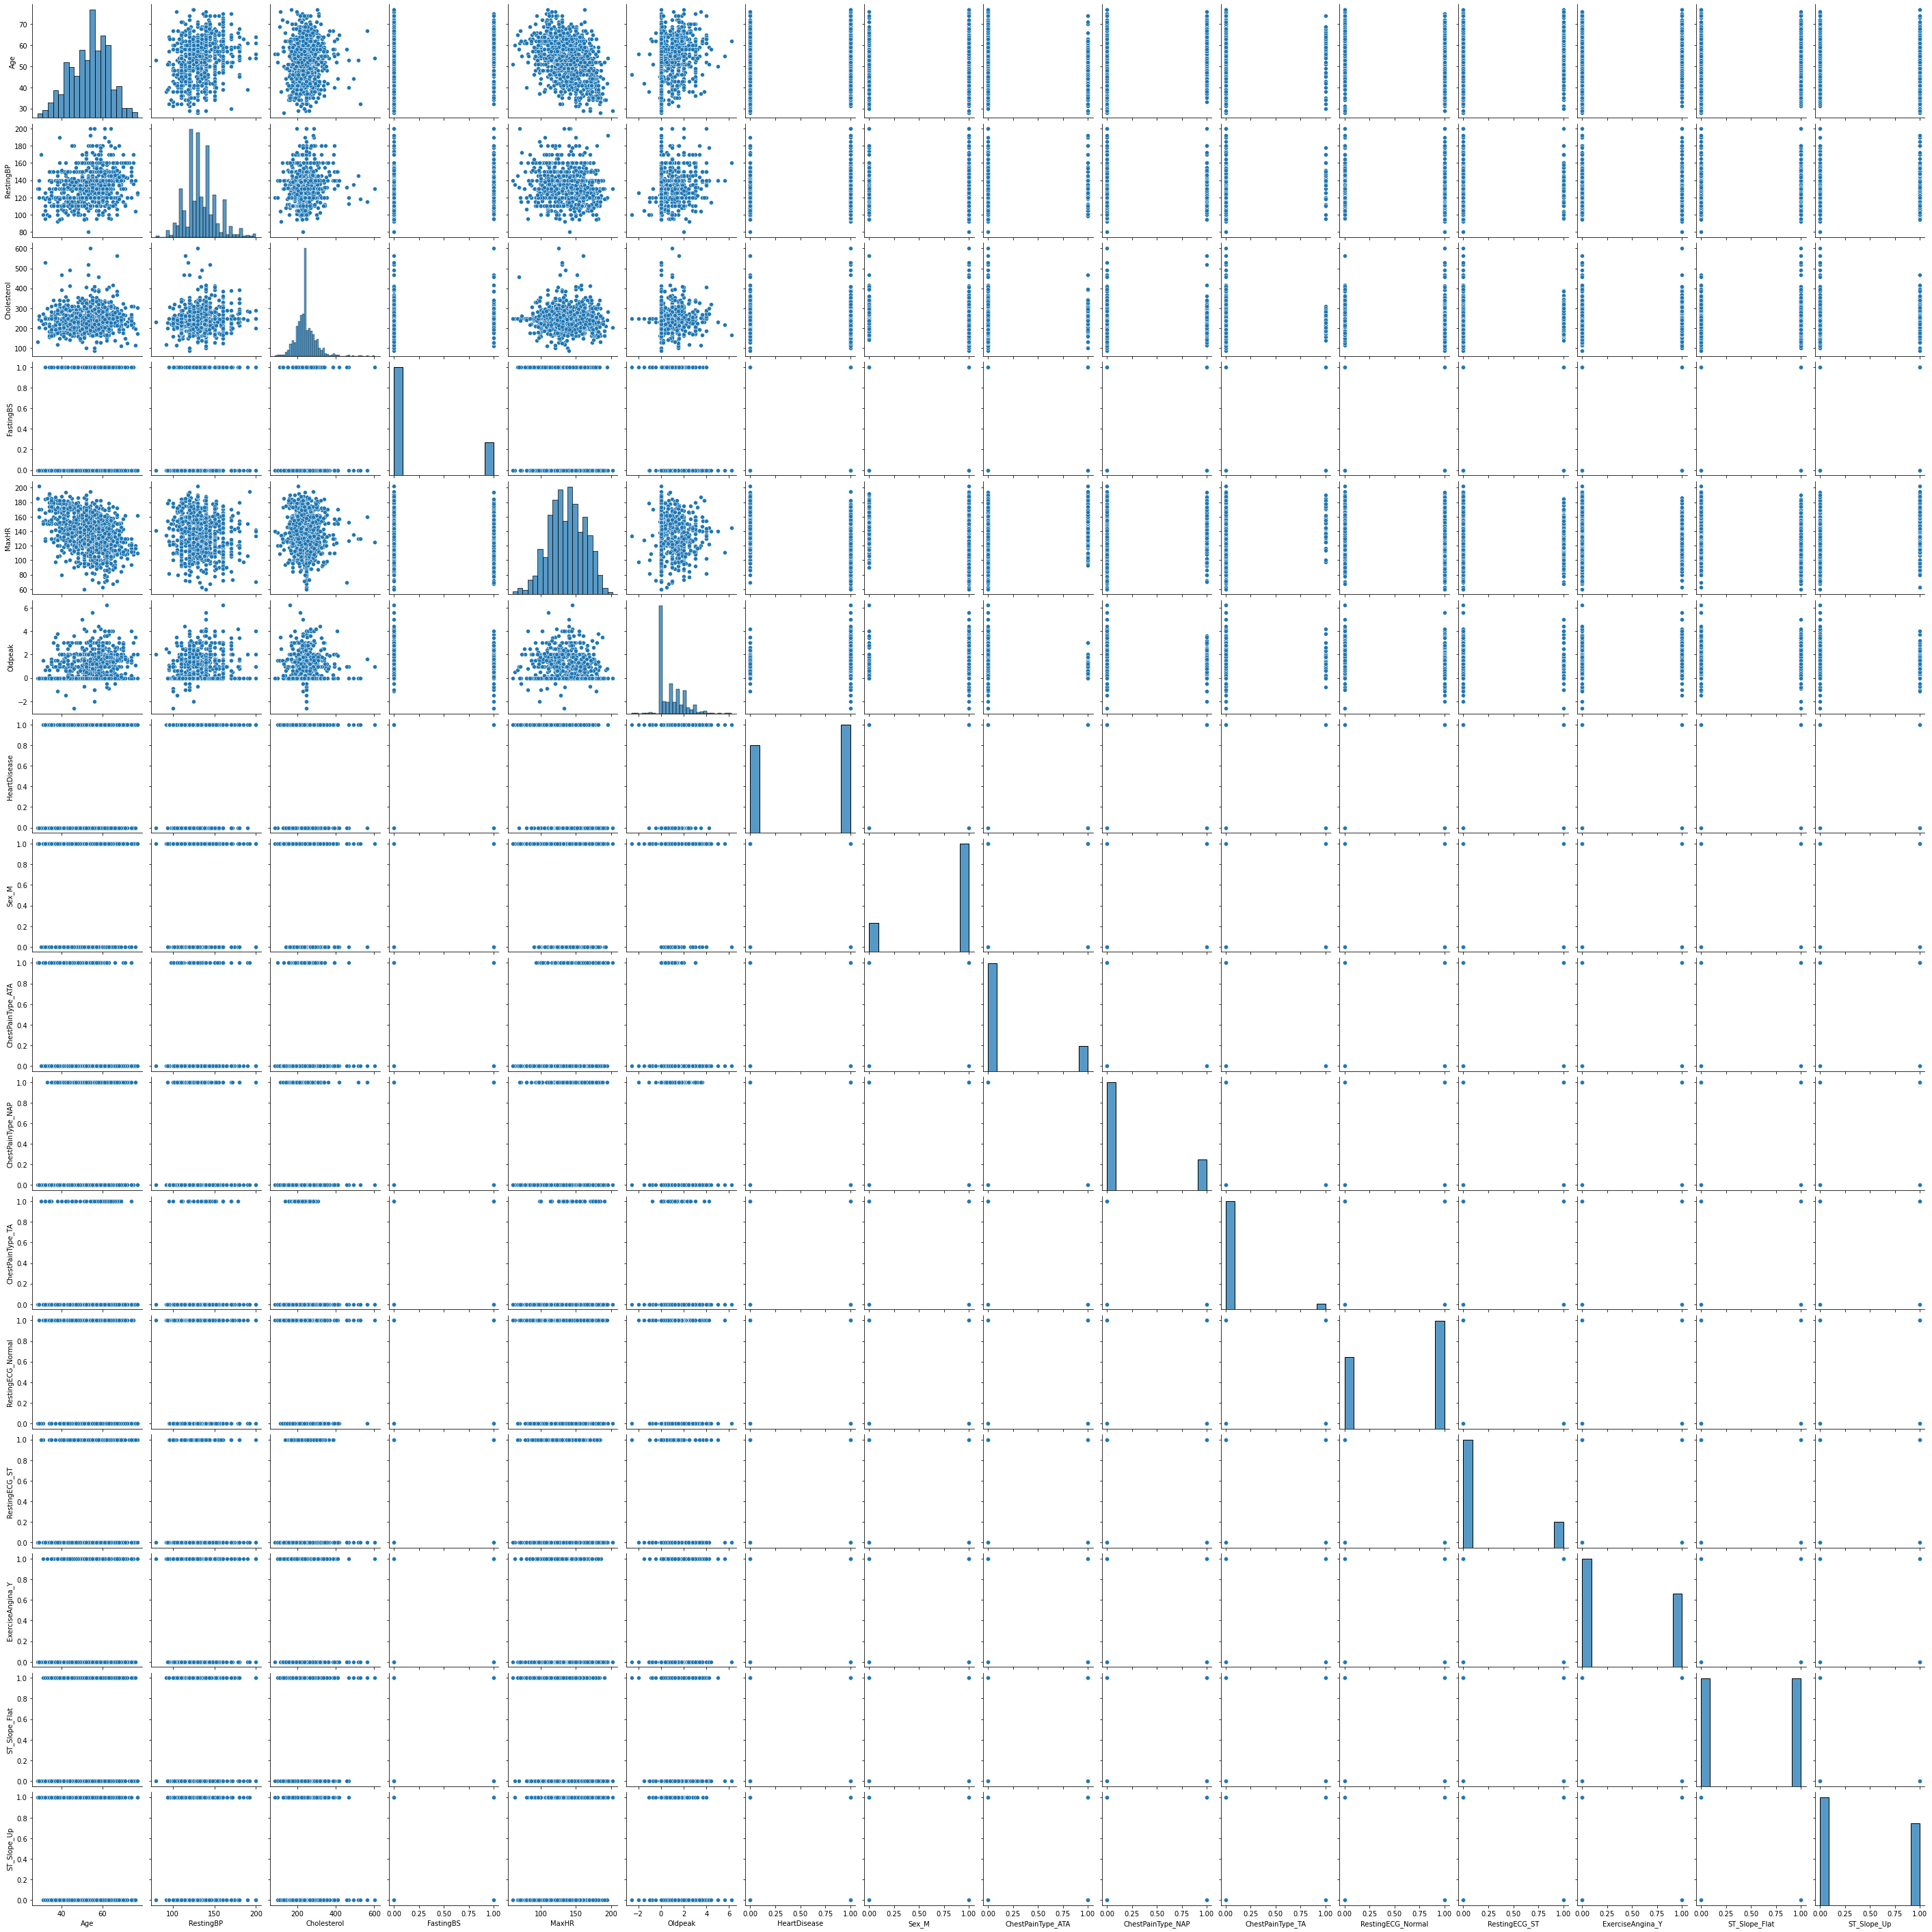

In [153]:
sns.pairplot(clean)
plt.show()

In [157]:
clean.shape

(917, 16)

## Calculate the Correlation

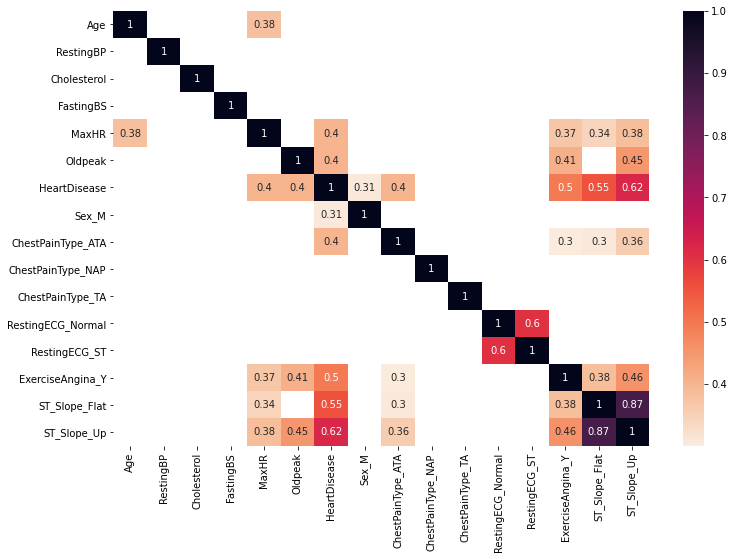

In [70]:
corr = abs(clean.corr())
plt.figure(figsize=(12,8))
sns.heatmap(corr[corr > 0.3], annot=True, cmap="rocket_r");
plt.show()

## Building the Model to Make Predictions

In [183]:
X = clean.drop(columns="HeartDisease")
y = clean["HeartDisease"].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)
features = ["MaxHR", "Oldpeak","Sex_M", "ChestPainType_ATA","ExerciseAngina_Y","ST_Slope_Flat", "ST_Slope_Up"]
num = [c for c in X.columns if c not in features]
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train[features], y_train)
accuracy = knn.score(X_val[features], y_val)
print(f"The KNN Classifier trained on {features} and with k=3 has an accuracy score of {accuracy*100:.2f}%")

The KNN Classifier trained on ['MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'] and with k=3 has an accuracy score of 80.43%


In [171]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.fit_transform(X_val[features])
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_val_scaled, y_val)
print(f"Accuracy score of {accuracy*100:.2f}%")


Accuracy score of 80.98%


## HyperParameter Optimization

In [185]:
X = clean.drop(columns="HeartDisease")
y = clean["HeartDisease"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
features = ["MaxHR", "Oldpeak","Sex_M", "ChestPainType_ATA","ExerciseAngina_Y","ST_Slope_Flat", "ST_Slope_Up"]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_train_scaled

array([[0.94366197, 0.38636364, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.83098592, 0.29545455, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.45774648, 0.40909091, 1.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.69014085, 0.36363636, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.4084507 , 0.29545455, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.49295775, 0.52272727, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [186]:
grid_params = {
    "n_neighbors": range(1,20),
    "metric": ["minkowski", "manhattan"]
}

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring="accuracy")
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 20)},
             scoring='accuracy')

In [187]:
knn_grid.best_score_*100, knn_grid.best_params_

(85.2576647097195, {'metric': 'minkowski', 'n_neighbors': 12})

In [188]:
X_test_scaled = scaler.transform(X_test[features])
predictions = knn_grid.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f" Model Accuracy score is {accuracy*100:.2f}%")

 Model Accuracy score is 81.52%


<Figure size 1152x1080 with 0 Axes>

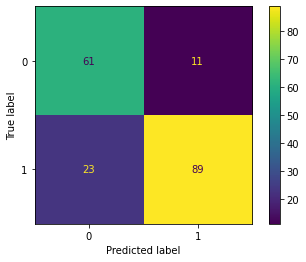

In [191]:
fig = plt.figure(figsize =(16,15))
cf = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cf).plot();
plt.show()